In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/euro_cad.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head(2)

,Rate
Date,
2014-01-01 23:58:00,1.46520
2014-01-02 23:58:00,1.45779


<AxesSubplot:xlabel='Date'>

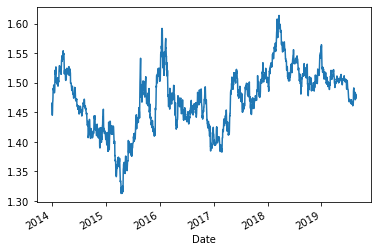

In [3]:
# Daily EUR to CAD exchange rates
df.Rate.plot()

In [4]:
# Daily percentage changes in exchange rate (resampled to daily)
df['Return'] = df.Rate.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Rate,Return
Date,,
2014-01-02,1.45779,-12.137592
2014-01-03,1.44500,-21.056531
2014-01-04,1.44500,0.000000
2014-01-05,1.44540,0.664360
2014-01-06,1.45290,12.453300


<AxesSubplot:xlabel='Date'>

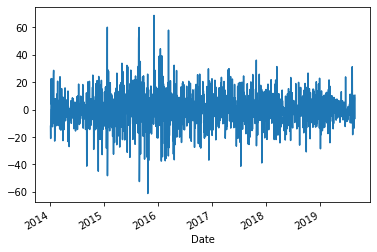

In [5]:
# Plot returns
df.Return.plot()

# GARCH

In [6]:
# Create the GARCH model
from arch import arch_model
model = arch_model(df.Return, mean="Zero", vol="GARCH", p=2, q=2)
results = model.fit(disp="off")

In [7]:
# Output the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7558.12
Distribution:                  Normal   AIC:                           15126.2
Method:            Maximum Likelihood   BIC:                           15154.3
                                        No. Observations:                 2005
Date:                Mon, Apr 19 2021   Df Residuals:                     2005
Time:                        21:43:13   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.0575      0.745      1.419      0.156      [ -0.404,  2.518]
alpha[1]       0.0527  1.399e-02      3.767  1.650e-04  [2.529e-02,8.014e-02]
alpha[2]       0.0000  1.159e-02      0.000      1.000 [-2.271e-02,2.271e-02]
beta[1]    5.7134e-03  2.663e-02      0.215      0.830 [-4.649e-02,5.792e-02]
beta[2]        0.9329  2.788e-02     33.464 1.600e-245      [  0.878,  0.988]
=============================================================================

Covariance estimator: robust
"""

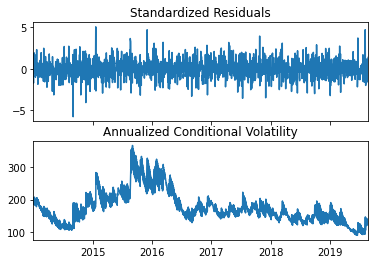

In [8]:
# Plot the model estimate of the annualized volatility
fig = results.plot(annualize='D')

# Forecasting from GARCH

In [9]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-08-23'

In [10]:
# Create a 5 day forecast of EUR to CAD exchange rate volatility
forecast_horizon = 5
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

In [11]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-08-23,137.271375,123.033364,136.857079,124.427773,136.543301


# Visualizing the forecast

In [12]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-08-23
h.1,137.271375
h.2,123.033364
h.3,136.857079
h.4,124.427773
h.5,136.543301


<AxesSubplot:title={'center':'5 Day Exchange Rate Forecast of Volatility'}>

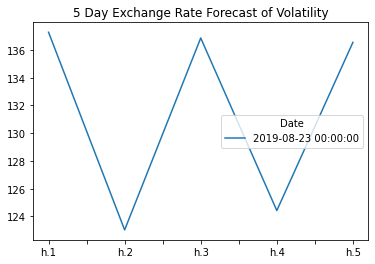

In [13]:
# Plot the final forecast
final.plot(title="5 Day Exchange Rate Forecast of Volatility")